# Ex4.9 Python Visualisations

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create file path
path = r'//Users/amypalomino/Documents/(03.22) InstaCart Basket Analysis/02 Data'

In [3]:
# Import dataframe ords_prods_merged
ords_prods_merge = pd.read_pickle(
            os.path.join(path,'Prepared Data', 'orders_products_merged.pkl'))

In [4]:
ords_prods_merge.shape

(32435059, 23)

In [5]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,prices,price_range_loc,busiest day,busiest_period_of_day,max_order,loyalty_flag,average_price,High/Low_Spender,median_order_frequency,Order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,9.0,Mid range product,Regular Busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,12.5,Mid range product,Regular Busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,4.4,Low range product,Regular Busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,4.7,Low range product,Regular Busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,1.0,Low range product,Regular Busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer


# Creating bar charts

<AxesSubplot:>

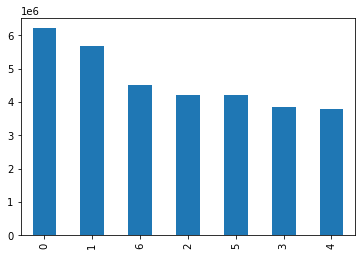

In [7]:
# Bar chart of ords/day
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

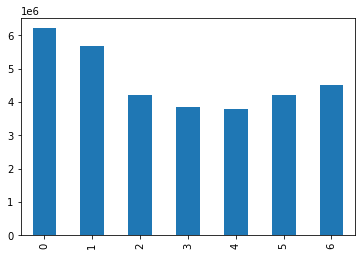

In [8]:
# Bar chart of ords/day sroted by index
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

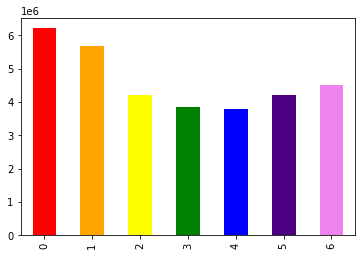

In [9]:
# Adding colours to bar chart
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

# Exporting visualisations

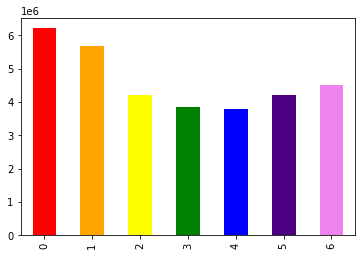

In [10]:
# Create object to save plot to jupyter memory called 'bar'
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(
    color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

In [18]:
# Reassign path not including Data folder
path = r'//Users/amypalomino/Documents/(03.22) InstaCart Basket Analysis'

In [20]:
# Export as png file to relevant folder
bar.figure.savefig(
    os.path.join(
    path, '04 Analysis', 'Visulaisations','bar_orders_dow_png'))

# Creating Histograms & Scatterplots

<AxesSubplot:ylabel='Frequency'>

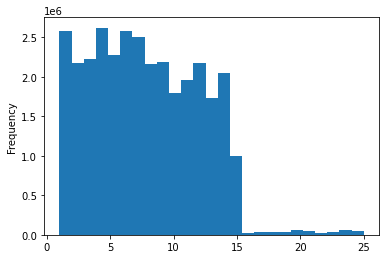

In [21]:
 ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

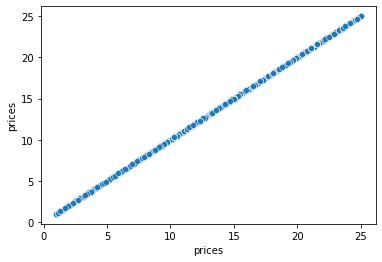

In [22]:
# Using scatterplot to reveal outliers
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

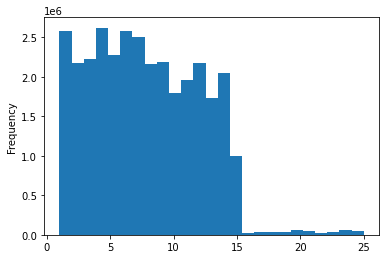

In [23]:
# Create object of histogram 
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

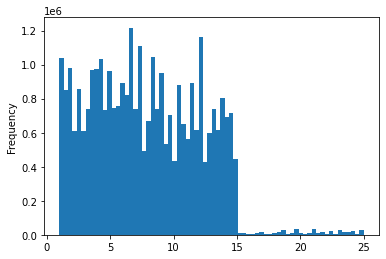

In [24]:
# Increasing number of bins 
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [25]:
# Exporting hist to folder
hist.figure.savefig(
    os.path.join(
    path, '04 Analysis', 'Visulaisations','hist_prices_png'))

In [26]:
# Exporting hist_2 to folder
hist_2.figure.savefig(
    os.path.join(
    path, '04 Analysis', 'Visulaisations','hist_2_prices_png'))

# Creating a Random Sample from dataframe

In [27]:
# Set the seed for the random number generator as 4
np.random.seed(4)

In [28]:
# Create a list holding True/False values to test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [29]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [30]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [31]:
len(ords_prods_merge)

32435059

In [32]:
len(big) + len(small)

32435059

In [33]:
# Reduce columns to only those required for chart using small df
df_2 = small[['order_day_of_week','prices']]

# Create line chart 


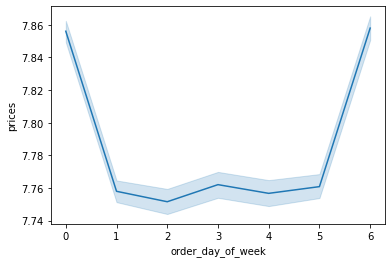

In [34]:
line = sns.lineplot(data = df_2, 
                   x = 'order_day_of_week',
                   y = 'prices')

In [35]:
# Chart isn't what I was expecting so will explore the sample df
df_2['prices'].describe()

count    9.720790e+06
mean     7.790533e+00
std      4.240958e+00
min      9.900000e-01
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [37]:
df_2['order_day_of_week'].describe()

count    9.729960e+06
mean     2.738543e+00
std      2.089969e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: order_day_of_week, dtype: float64

- Nothing jumps out within the basics stats. I wonder if altering the 2 outlier prices with 0.99 and 1.49 in the previous task rather than using Nan as this task described, has altered my results by this much?
- The y axis showing prices, shows a very small variance, all around the mean of the price range. 

In [40]:
# Exporting line chart to folder
line.figure.savefig(
    os.path.join(
    path, '04 Analysis', 'Visulaisations','dow_prices_png'))